In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data_reg = pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)
data_reg.head()
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc = StandardScaler().set_output(transform = "pandas")
le = LabelEncoder()
scaled_data_reg = sc.fit_transform(data_reg)
scaled_data_reg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
from factor_analyzer import FactorAnalyzer,calculate_kmo

In [10]:
x,score = calculate_kmo(scaled_data_reg)
score

0.8322253094685831

In [20]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [85]:
# [variance_inflation_factor(scaled_data_reg,i) for i in range(len(scaled_data_reg.columns)-1)]

In [32]:
principal = PCA(6)
principal.fit(scaled_data_reg)
principal.n_components_ 
principal.explained_variance_ 

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224])

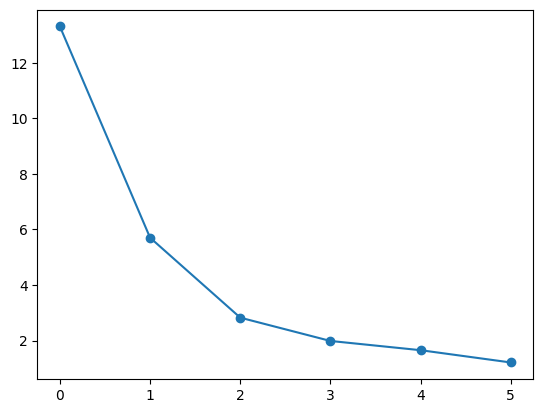

In [40]:
import matplotlib.pyplot as plt
x = [i for i in range (6) ] 
plt.scatter( x = x,y = principal.explained_variance_  )
plt.plot(principal.explained_variance_ )

In [62]:
fa = FactorAnalyzer(n_factors = 6,rotation = "varimax")
factor_analyzed = fa.fit_transform(scaled_data_reg)
fa_lodings = pd.DataFrame(factor_analyzed,columns = [i for i in range(6)])

In [69]:
[variance_inflation_factor(fa_lodings,i) for i in range(len(fa_lodings.columns))]

[1.0003969114325588,
 1.000663489371278,
 1.0008760140255692,
 1.001940357642755,
 1.0028584190330132,
 1.0039127220123485]

In [171]:
from sklearn.linear_model import LogisticRegression ,LinearRegression,ridge_regression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC ,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans,DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,classification_report,accuracy_score

In [ ]:
# Regression

In [117]:
x = fa_lodings.iloc[:,:-1]
y = fa_lodings.iloc[:,-1]

In [99]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.20)

In [100]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [107]:
mean_squared_error(lin.predict(x_test),y_test)
r2_score(lin.predict(x_test),y_test)

-194.87312227028613

In [136]:
pf = PolynomialFeatures(1).set_output(transform = "pandas")
poly_trans_train  = pf.fit_transform(x_train)
poly_trans_test = pf.fit_transform(x_test)
poly_trans_train.shape

(455, 6)

In [138]:
lini = SVR()
lini.fit(poly_trans_train,y_train)
mean_squared_error(lini.predict(poly_trans_test),y_test)
r2_score(lini.predict(poly_trans_test),y_test)

SVR()

In [145]:
ls = Lasso(alpha = 0.1)
ls.fit(x_train,y_train)
mean_squared_error(ls.predict(x_test),y_test)
r2_score(ls.predict(x_test),y_test)

-4.6829015691359e+33

In [ ]:
# Classification

In [149]:
data_class = pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)
data_class["Target"] = load_breast_cancer().target

In [222]:
x = data_class.iloc[:,:-1]
y =  data_class.iloc[:,-1]

In [166]:
fa = FactorAnalyzer(n_factors = 6 ,rotation = "varimax")
fa_class= fa.fit_transform(x)
fa_class = pd.DataFrame(fa_class,columns = [i for i in range(6)])

In [168]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2)

In [173]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
accuracy_score(dtc.predict(x_test),y_test)

0.956140350877193

In [174]:
svc = SVC()
svc.fit(x_train,y_train)
accuracy_score(svc.predict(x_test),y_test)

0.9473684210526315

In [177]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
accuracy_score(knc.predict(x_test),y_test)

0.9298245614035088

In [180]:
log = LogisticRegression()
log.fit(x_train,y_train)
accuracy_score(log.predict(x_test),y_test)

C:\Users\niles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9649122807017544

In [ ]:
# Clusters 

In [186]:
km = KMeans(n_clusters = 2)
data_class["cluster"] = km.fit_predict(x)
import seaborn as sns
plt.scatter(data_class.iloc[:,5],y,c = data_class["cluster"])

C:\Users\niles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


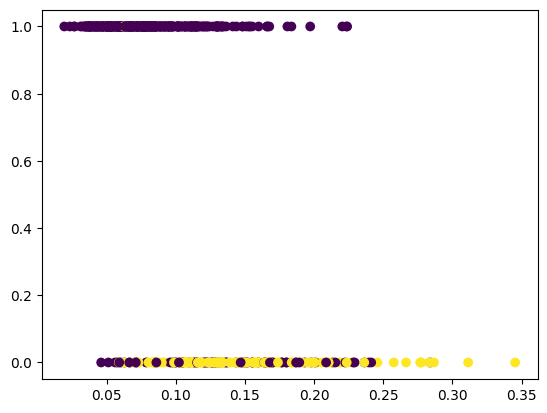

In [195]:
dbsc = DBSCAN(eps =10,min_samples = 3)
dbsc.fit_predict(x)
data_class["cluster_dbscan"] = dbsc.fit_predict(x)
plt.scatter(data_class.iloc[:,5],y,c = data_class["cluster"])

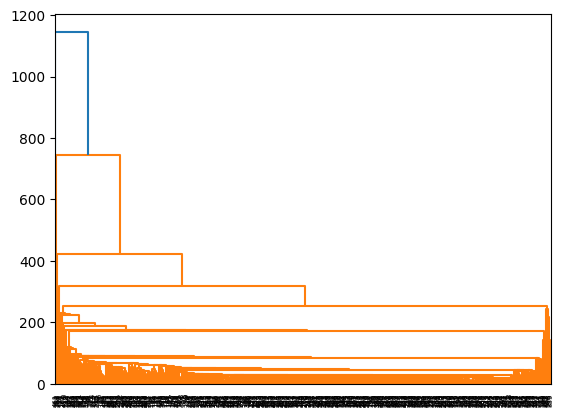

In [226]:
new =hierarchy.linkage(x,'single' )
plt.figure()
d = hierarchy.dendrogram(new)

In [ ]:
# Performance Evaluation

In [244]:
from sklearn.model_selection import GridSearchCV ,KFold,cross_val_score

In [240]:
# params = {max_depth : [i for i in range (6)]}
params = {"algorithm": ["brute","ball_tree"]}
gscv = GridSearchCV(knc,cv=3,param_grid = params )
gsdtc = gscv.fit(x,y)
gsdtc.best_params_ 

{'algorithm': 'brute'}

In [243]:
import warnings
warnings.filterwarnings("ignore")

params = {"n_neighbors" : [i for i in range (6)]}
gscv = GridSearchCV(knc,cv=3,param_grid = params )
gsknn = gscv.fit(x,y)
gsknn.best_params_ 

{'n_neighbors': 2}

In [246]:
kf = KFold(n_splits = 5)
cross_val_score(dtc,x,y,cv=kf)

array([0.92105263, 0.87719298, 0.85964912, 0.8245614 , 0.88495575])